# Principal Component Analysis with Cancer Data

In [334]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [335]:
data = pd.read_csv('breast-cancer-wisconsin-data.csv')
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [336]:
data.sample(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
534,1056171,2,1,1,1,2,1,2,1,1,2
10,1035283,1,1,1,1,1,1,3,1,1,2
599,1334659,5,2,4,1,1,1,1,1,1,2
214,1222047,10,10,10,10,3,10,10,6,1,4
197,1213383,5,1,1,4,2,1,3,1,1,2


In [337]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [338]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Inference

- It is seen that all the features are of integer type 
- However, Bare Nuclei which should also be integer is shown as object 
- This means there is an issue with the data in that column

In [339]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

### Inferences
 
- As expected we see that there is a '?' in the data in Bare Nucluei column
- This will be dealt with later

In [340]:
data.shape

(699, 11)

### Inferences

- There are 699 records and 11 features in the data set 
- Out of that 1 is a class variable and 1 is ID variable - hecne 9 features

In [341]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


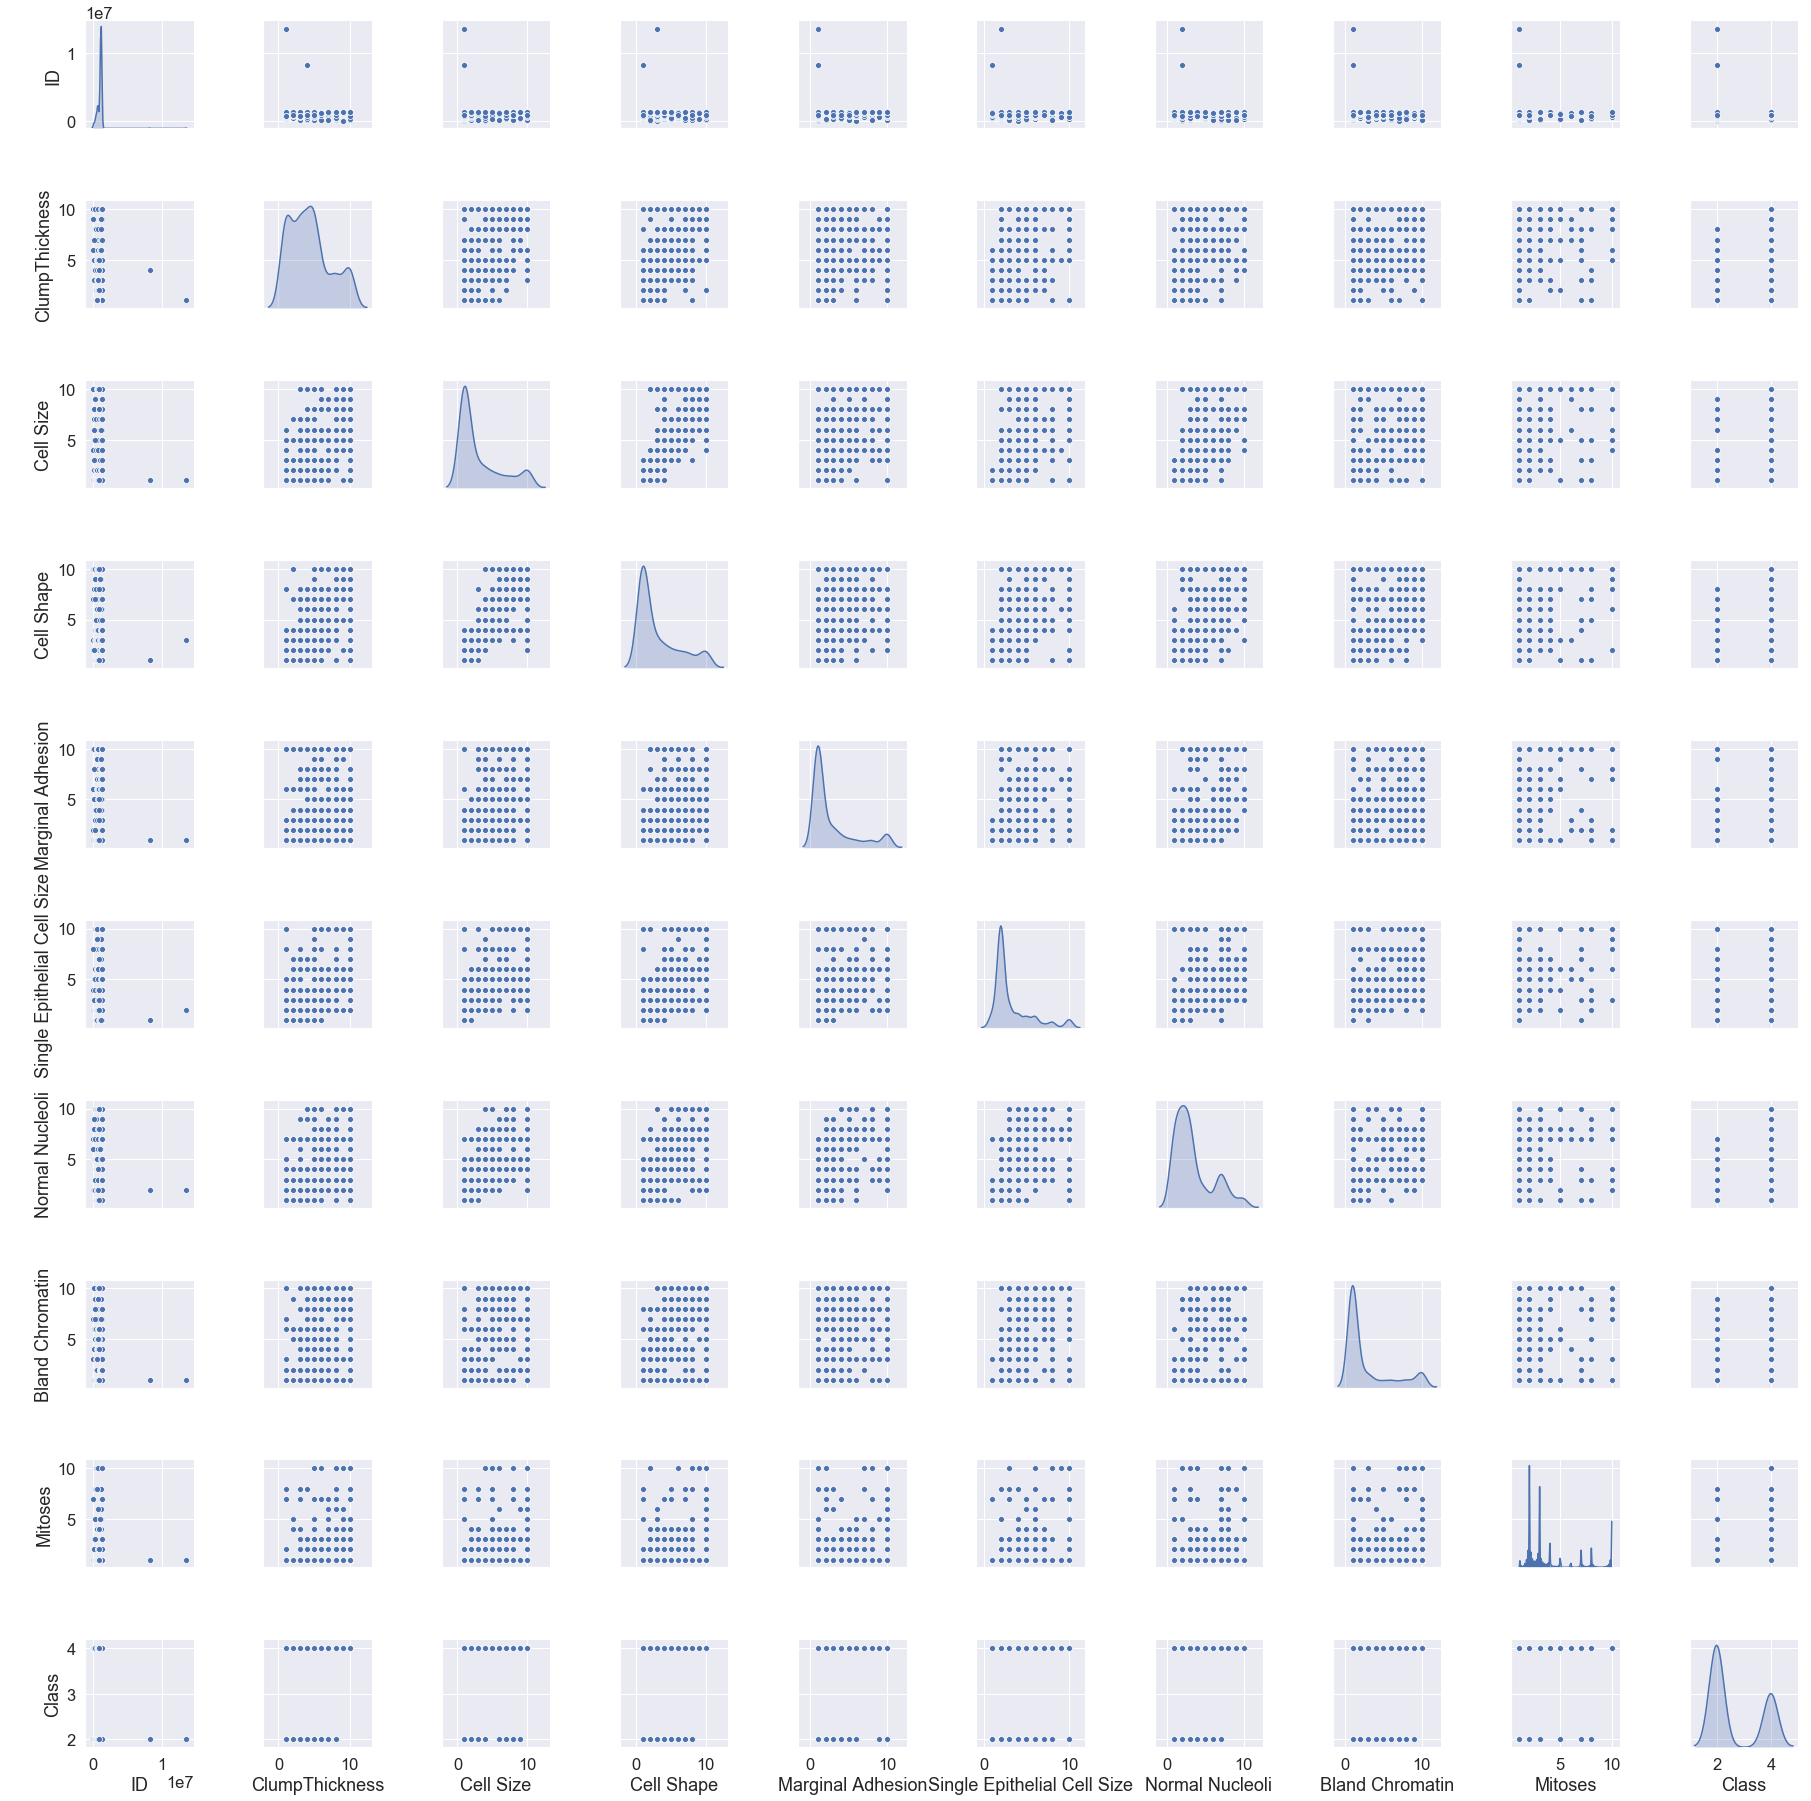

In [342]:
sns.pairplot(data, diag_kind = 'kde');

### Inferences

- There are 699 data points for each of the columns 
- Cell Size, Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoili, Bland hromatin all seen to be positively skewed
- The Class variable has 2 values - 2 and 4

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [343]:
# We could see "?" values in column, this should be removed from data set
data.isna().sum()
# Check for missing value in any other column

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Inferences

- There are no missing values in any of the columns

In [344]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [345]:
print("The number of records with '?' in the data set is ", data[data['Bare Nuclei'] == '?'].shape[0])

The number of records with '?' in the data set is  16


In [346]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

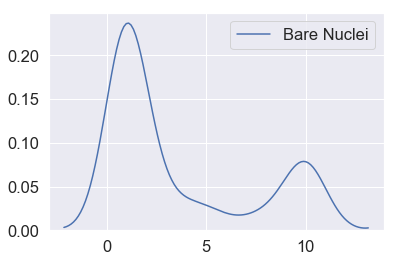

In [347]:
BN = data[data['Bare Nuclei'] != '?']
sns.kdeplot(BN['Bare Nuclei'])


In [348]:
BN['Bare Nuclei'].describe()

count     683
unique     10
top         1
freq      402
Name: Bare Nuclei, dtype: object

### Inferences 

- There are 402 values with value 1
- Bare Nucluei takes discrete values between 1 and 10 
- Hence we replace the '?' with mode which is 1

In [349]:
data.replace(to_replace ="?",value = 1, inplace=True)

In [350]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 1, '5', '8', '6'], dtype=object)

In [351]:
data['Bare Nuclei']=data[['Bare Nuclei']].apply(pd.to_numeric)

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Inference

- Now we see that the '?' are removed and the column is now converted to interget type

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [353]:
# Check for correlation of variable

In [354]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


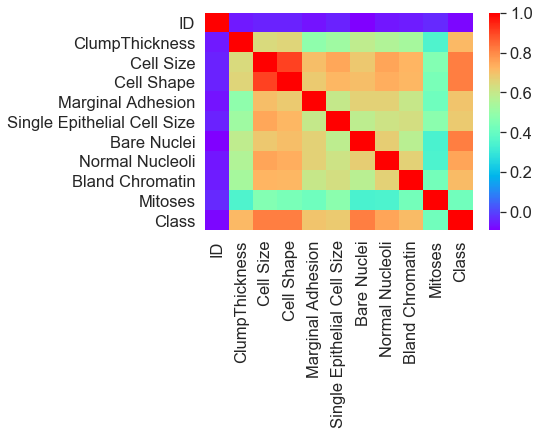

In [355]:
sns.heatmap(data.corr(), cmap = 'rainbow')

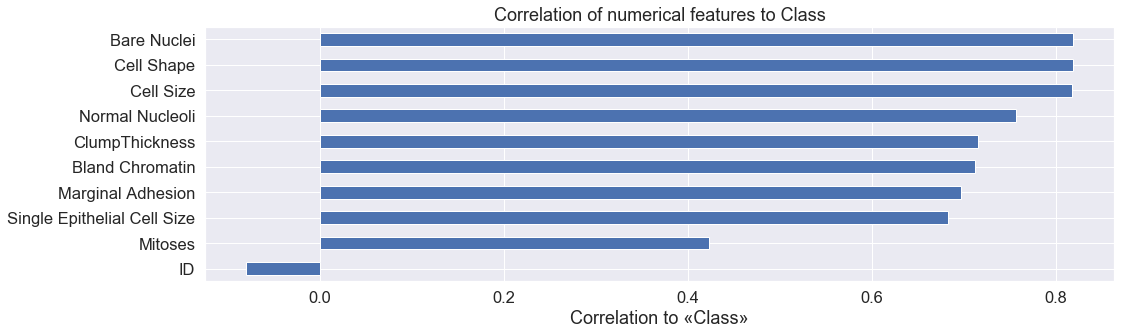

In [356]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["Class"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to Class")
plt.xlabel("Correlation to «Class»")
plt.tight_layout()
plt.show()

### Inferences:

- Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
and bland chromatin
- Target variable shows high correlation with most of these variables

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


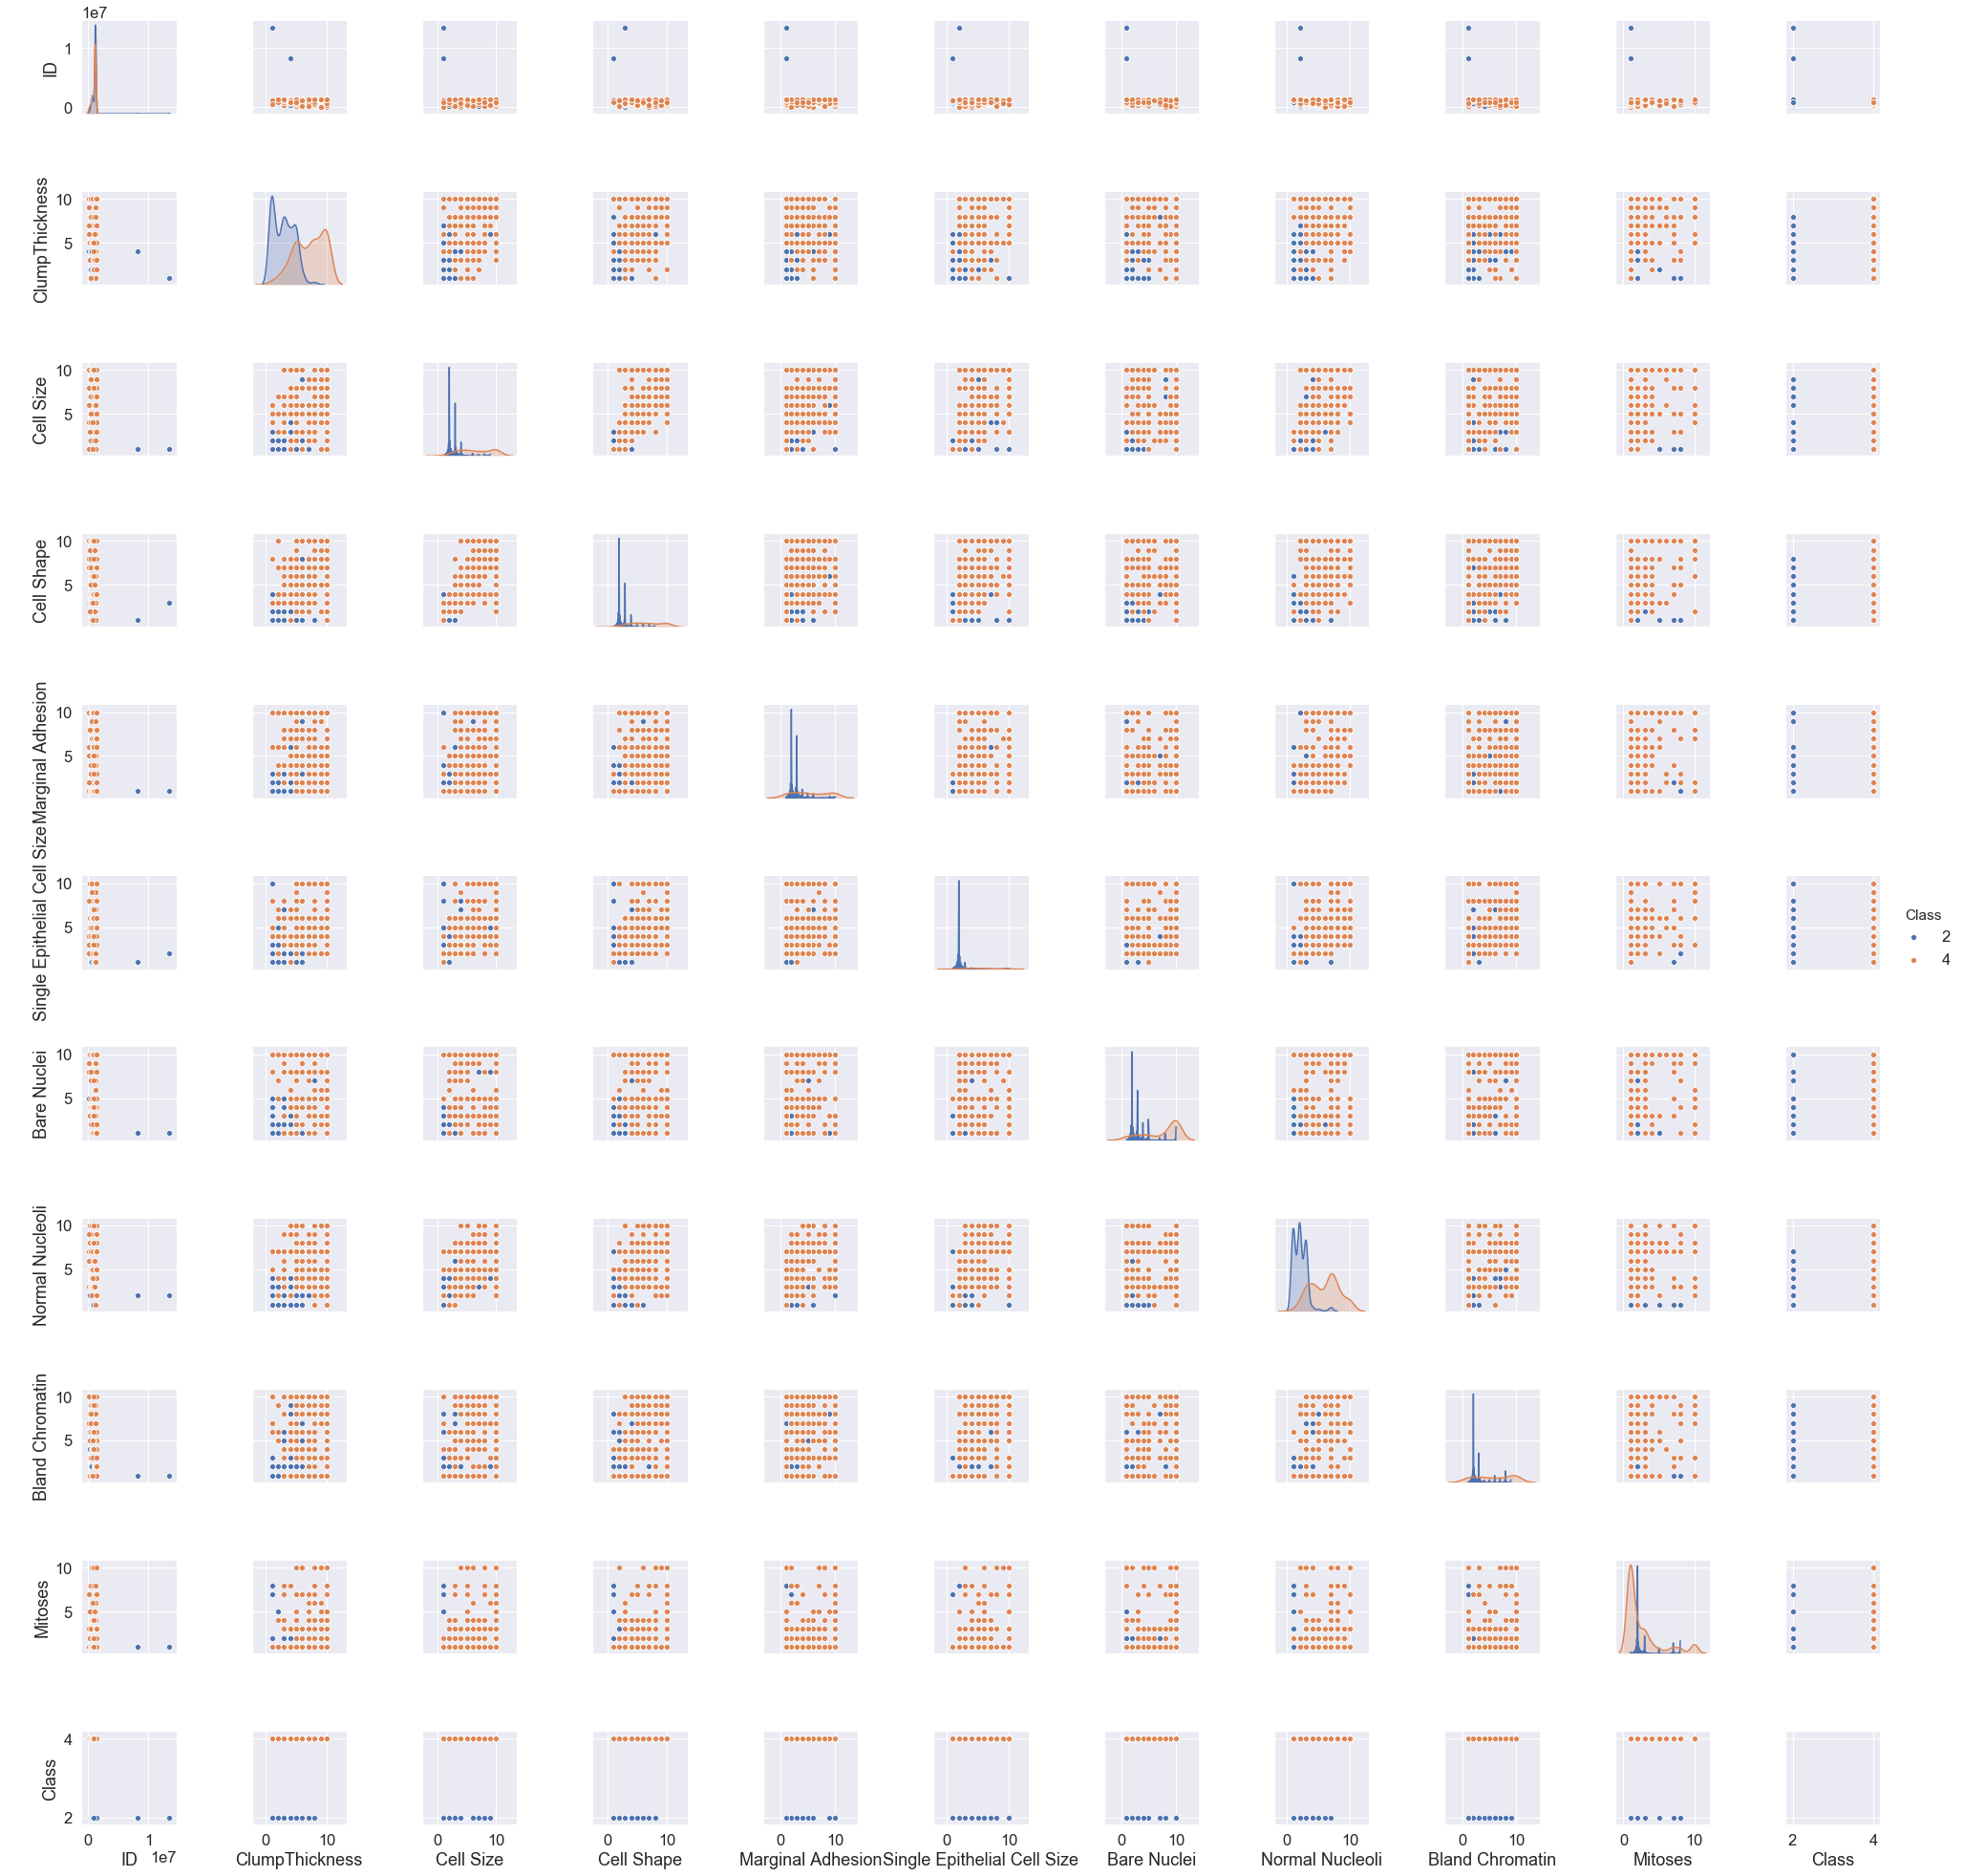

In [357]:
sns.pairplot(data, hue = 'Class')

### Inferences

- There is a clear separation for most variables with respect to class

In [358]:
#Let us check for pair plots

In [359]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [360]:
data[data.duplicated('ID')].count()

ID                             54
ClumpThickness                 54
Cell Size                      54
Cell Shape                     54
Marginal Adhesion              54
Single Epithelial Cell Size    54
Bare Nuclei                    54
Normal Nucleoli                54
Bland Chromatin                54
Mitoses                        54
Class                          54
dtype: int64

In [361]:
data.drop_duplicates('ID', keep = 'first', inplace= True)

In [362]:
data[data.duplicated('ID')].count()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [363]:
data.shape

(645, 11)

### Inference

- We see that all the duplicate rows (54 of them were present), has been dropped

### Now to drop the ID column 

In [364]:
data = data.drop('ID', axis = 1)

### Checking for Outliers

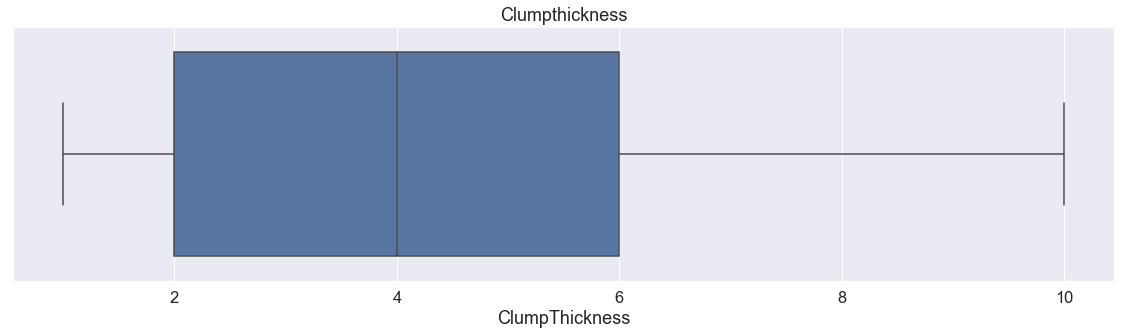

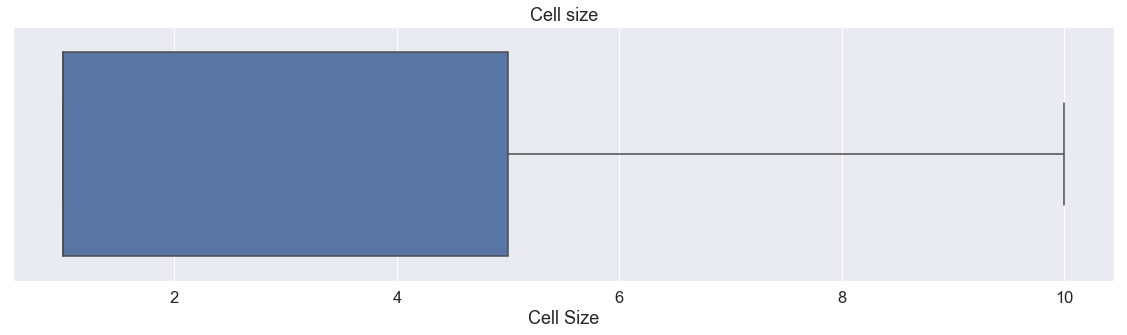

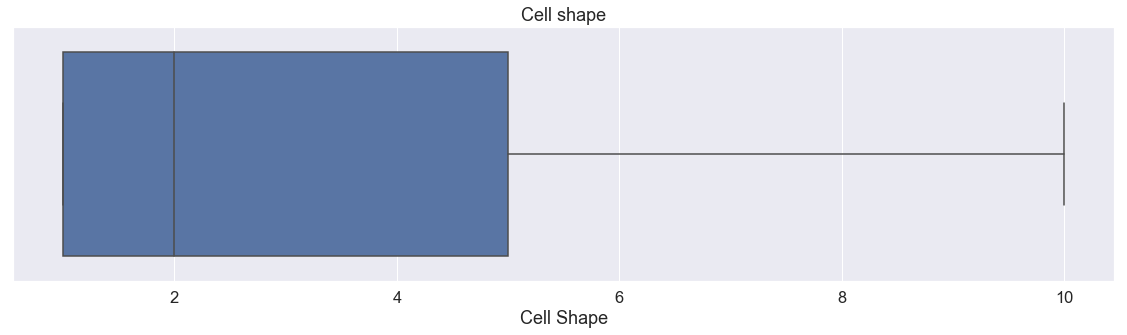

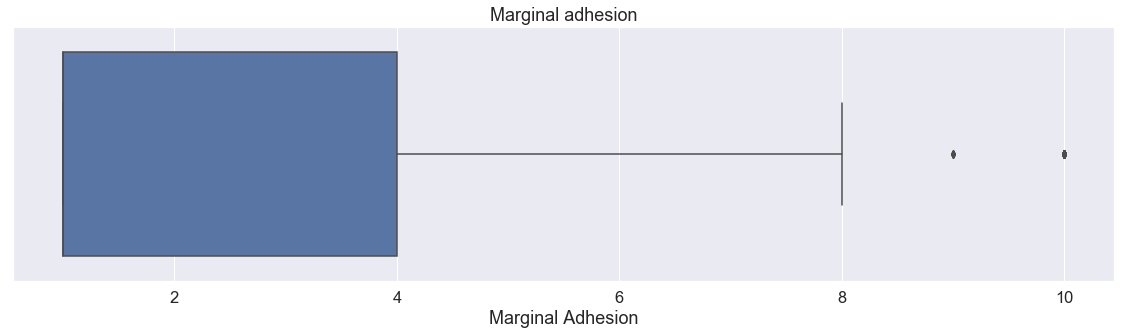

In [ ]:
for feature in data.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    #sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    #plt.xlim(df[feature].min(), df[feature].max())
    sns.boxplot(data[feature])
    plt.title(f"{feature.capitalize()}")
    plt.tight_layout()
    #plt.show()

### Outliers are seen in some of the columns like Bland Chromatin, Normal Necleuoi, Single Epithelial Cell size, Marginal Adhesion, 

In [ ]:
# We could see most of the outliers are now removed.
data.columns

In [ ]:
pd.crosstab((data["Bland Chromatin"]), data['Class'])

### Inference 

- Outlier in this case is value 10. We can replace 10 with 9. The result are identical. Any other changing will result in increase in False Negatives in the final data set


In [ ]:
data['Bland Chromatin'] = data['Bland Chromatin'].replace(10, 9)

In [ ]:
pd.crosstab((data["Bland Chromatin"]), data['Class'])

### Bland Chromatin now has all values less than equal to 9

In [ ]:
pd.crosstab((data["Normal Nucleoli"]), data['Class'])

### Inference

- All Values greater than 7 have same performance
- Hence we replace these will 7

In [ ]:
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli']>7,7, data['Normal Nucleoli'])

In [ ]:
pd.crosstab((data["Normal Nucleoli"]), data['Class'])

### Normal Normal Nucleoli now has all values less than equal to 9

In [ ]:
pd.crosstab((data["Single Epithelial Cell Size"]), data['Class'])

###  Inference 

- We can designate anything over 7 as outlier

In [ ]:
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size']>7,7, data['Single Epithelial Cell Size'])
pd.crosstab((data["Single Epithelial Cell Size"]), data['Class'])

### All values of Single Epiuthelian Cell is below 8

In [ ]:
pd.crosstab((data["Marginal Adhesion"]), data['Class'])

### Inference 

- We can deisgnate anything over 6 as an outlier

In [ ]:
data['Marginal Adhesion'] = np.where(data['Marginal Adhesion']>6,6, data['Marginal Adhesion'])
pd.crosstab((data["Marginal Adhesion"]), data['Class'])

### Marginal Adhesion has value less than 6 now

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix
# split data table into data X and class labels y
X = data.drop('Class', axis = 1)
y = data['Class']
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

In [ ]:

cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)



# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [ ]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

# Q8 Find variance and cumulative variance by each eigen vector

In [ ]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [ ]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA



pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

In [ ]:
data["PC1"] = data_reduced[:,0]
data["PC2"] = data_reduced[:,1]
data['PC3'] = data_reduced[:,2]
data['PC4'] = data_reduced[:,3]
data['PC5'] = data_reduced[:,4]
vis = sns.lmplot(data = data[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

In [ ]:
vis = sns.lmplot(data = data[["PC2","PC3","Class"]], x = "PC2", y = "PC3",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

In [ ]:
vis = sns.lmplot(data = data[["PC3","PC1","Class"]], x = "PC3", y = "PC1",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

In [ ]:
vis = sns.lmplot(data = data[["PC1","PC5","Class"]], x = "PC1", y = "PC5",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

### There is very nice separation seen based on classes for the Pcs

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=5).fit_transform(X_sd)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Q10 Find correlation between components and features

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(), square=True, cmap='rainbow');



In [ ]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["PC1"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to PC1")
plt.xlabel("Correlation to «PC1»")
plt.tight_layout()
plt.show()

### PC1 has very strong correlation with Cell Size, Cell Shape and Class

In [ ]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["PC2"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to PC2")
plt.xlabel("Correlation to «PC2»")
plt.tight_layout()
plt.show()

### PC2 has strong correlation with Motosis

In [ ]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["PC3"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to PC3")
plt.xlabel("Correlation to «PC3»")
plt.tight_layout()
plt.show()

### PC3 has strong correlation with Clump Thickness

In [ ]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["PC4"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to PC4")
plt.xlabel("Correlation to «PC4»")
plt.tight_layout()
plt.show()

### PC4 is not very highly correlated with any feature, highest is with Bland Chromatin

In [ ]:
mat_corr = data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,5))
mat_corr["PC5"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to PC5")
plt.xlabel("Correlation to «PC5»")
plt.tight_layout()
plt.show()

### PC5 is not very highly correlated iwth any of the features, Single Epithelial Cell and Blamd Chromatin 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [ ]:
data_jokes = pd.read_csv('jokes.csv')
data_jokes.head(10)

In [ ]:
data_jokes.shape

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [ ]:
ratings = data_jokes.iloc[:200,1:]
ratings.shape

In [ ]:
ratings.head()

# Q13 Change the column indices from 0 to 99

In [ ]:
ratings.columns = np.arange(100).tolist()

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [ ]:
ratings.replace(99,0,inplace = True)
ratings.head()

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [ ]:
ratings_diff = StandardScaler().fit_transform(ratings.T)
### Since we have to scale by user and not column we perform scaling after transposing

In [ ]:
ratings_diff

In [ ]:
ratings_diff.shape

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [ ]:
mean = ratings_diff.mean(axis = 1)

In [ ]:
Mean_df = pd.DataFrame(mean)

In [ ]:
ratings = ratings.T

In [ ]:
ratings['Mean'] = mean
ratings.head()

In [ ]:
ratings.sort_values("Mean", inplace=True)

### TOP 10 JOKES

In [ ]:
ratings.head(10).index